### Load libraries.

In [1]:
import numpy as np
import geopandas as geopd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import box
import matplotlib.patches as mpatches
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Load San Luis Potosi metropolitan area shape file. Source: [Marco Geoestadístico INEGI (2023)](https://www.inegi.org.mx/temas/mg/) 

In [2]:
# INEGI data
gdf = geopd.read_file("../dataset/SLPMA/geometry/2023_1_24_A/2023_1_24_A.shp")

`gdf = geopd.read_file("../dataset/SLPMA/geometry/2023_1_24_A/2023_1_24_A.shp")`: This line reads a shapefile using GeoPandas. The file path points to the shapefile on the disk, containing geographic data for the state of San Luis Potosi. The read file is stored in the variable gdf as a GeoDataFrame, a data structure that supports spatial operations.

### Display data frame entries

Here are the more extensive definitions using INEGI descriptions in markdown format:

- `CVE_ENT`: State code provided by INEGI:** A unique numerical code assigned by the National Institute of Statistics and Geography (INEGI) to identify each of the 32 federal entities (states) of Mexico. This code is used in various statistical and administrative processes to ensure consistent identification of states across different datasets and surveys.

- `CVE_MUN`: Municipality code provided by INEGI: A unique numerical code assigned by INEGI to identify each of the municipalities within the states of Mexico. Each municipality code is unique within its state but may be reused in different states. This code helps in distinguishing municipalities in statistical data collection and analysis.

- `CVE_LOC`: Location code provided by INEGI: A unique numerical code assigned by INEGI to specific localities within municipalities. Localities can range from large cities to small rural settlements. This code facilitates detailed geographic and demographic analysis, allowing for precise identification and study of different localities.

- `CVE_AGEB`: Geographic area provided by INEGI:A unique code assigned by INEGI to identify Áreas Geoestadísticas Básicas (AGEBs), which are the smallest geographic units used for statistical purposes. AGEBs are subdivisions of localities and are used to organize data collection and analysis at a very granular level, enabling detailed geographic and demographic insights.

- `AMBITO`:  A classification used by INEGI to categorize areas as either urban or rural. This distinction is based on various criteria, including population density, infrastructure, and economic activities. Urban areas are typically characterized by higher population density and more developed infrastructure, while rural areas tend to have lower population density and less developed infrastructure. This classification is essential for tailoring public policies and resource allocation to the specific needs of urban and rural areas.


In [3]:
display(gdf)

CVEGEO CVE_ENT CVE_MUN CVE_LOC CVE_AGEB  AMBITO  \
0     2400100010198      24     001    0001     0198  Urbana   
1     2400100010200      24     001    0001     0200  Urbana   
2     2400100010107      24     001    0001     0107  Urbana   
3     2400100010111      24     001    0001     0111  Urbana   
4     2400100010145      24     001    0001     0145  Urbana   
...             ...     ...     ...     ...      ...     ...   
1577  2405800010237      24     058    0001     0237  Urbana   
1578  2405800010218      24     058    0001     0218  Urbana   
1579  2405800010148      24     058    0001     0148  Urbana   
1580  2405800010133      24     058    0001     0133  Urbana   
1581  2405800010129      24     058    0001     0129  Urbana   

                                               geometry  
0     POLYGON ((-101.15796 22.39861, -101.15829 22.3...  
1     POLYGON ((-101.15675 22.39860, -101.15675 22.3...  
2     POLYGON ((-101.16092 22.40463, -101.16092 22.4...  
3     POLYGON ((-101.16742 22.40622, -101.16756 22.4...  
4     POLYGON ((-101.16331 22.40754, -101.16353 22.4...  
...                                                 ...  
1577  POLYGON ((-99.30914 22.53072, -99.30760 22.528...  
1578  POLYGON ((-99.33210 22.54050, -99.33291 22.540...  
1579  POLYGON ((-99.32573 22.52434, -99.32573 22.524...  
1580  POLYGON ((-99.33050 22.53016, -99.33043 22.530...  
1581  POLYGON ((-99.32858 22.54007, -99.32837 22.539...  

[1582 rows x 7 columns]

This line displays the data frame gdf . In a Jupyter notebook, this will render the GeoDataFrame as a table, showing its contents and structure.

### San Luis Potosi metropilitan area consist of two municipalities: San Luis Potosí (SLP) and Soledad de Graciasno Sánchez (SGS).

In [4]:
# SLP
gdf_slp = gdf[gdf["CVE_MUN"] == "028"].copy()

In [5]:
#SGS
gdf_sgs = gdf[ gdf["CVE_MUN"] == "035"].copy()

In [6]:
# Concatenate frames
frames = [gdf_slp, gdf_sgs ]
gdf_zmslp = pd.concat(frames)

- `gdf_slp = gdf[gdf["CVE_MUN"] == "028"].copy()`: This line creates a geo data frame containing San Luis Potosí (SLP) municipality data. 

- 'gdf_sgs = gdf[ gdf["CVE_MUN"] == "035"].copy()`:This line creates a geo data frame containing Soledad de Graciano Sánchez (SGS) municipality data.

- `frames = [gdf_slp, gdf_sgs ]`,
  `gdf_zmslp = pd.concat(frames)`: This code block merges gdf_slp and gdf_sgsinto a data frame containing San Luis Potosí Metropolitan (SLPMA) data.

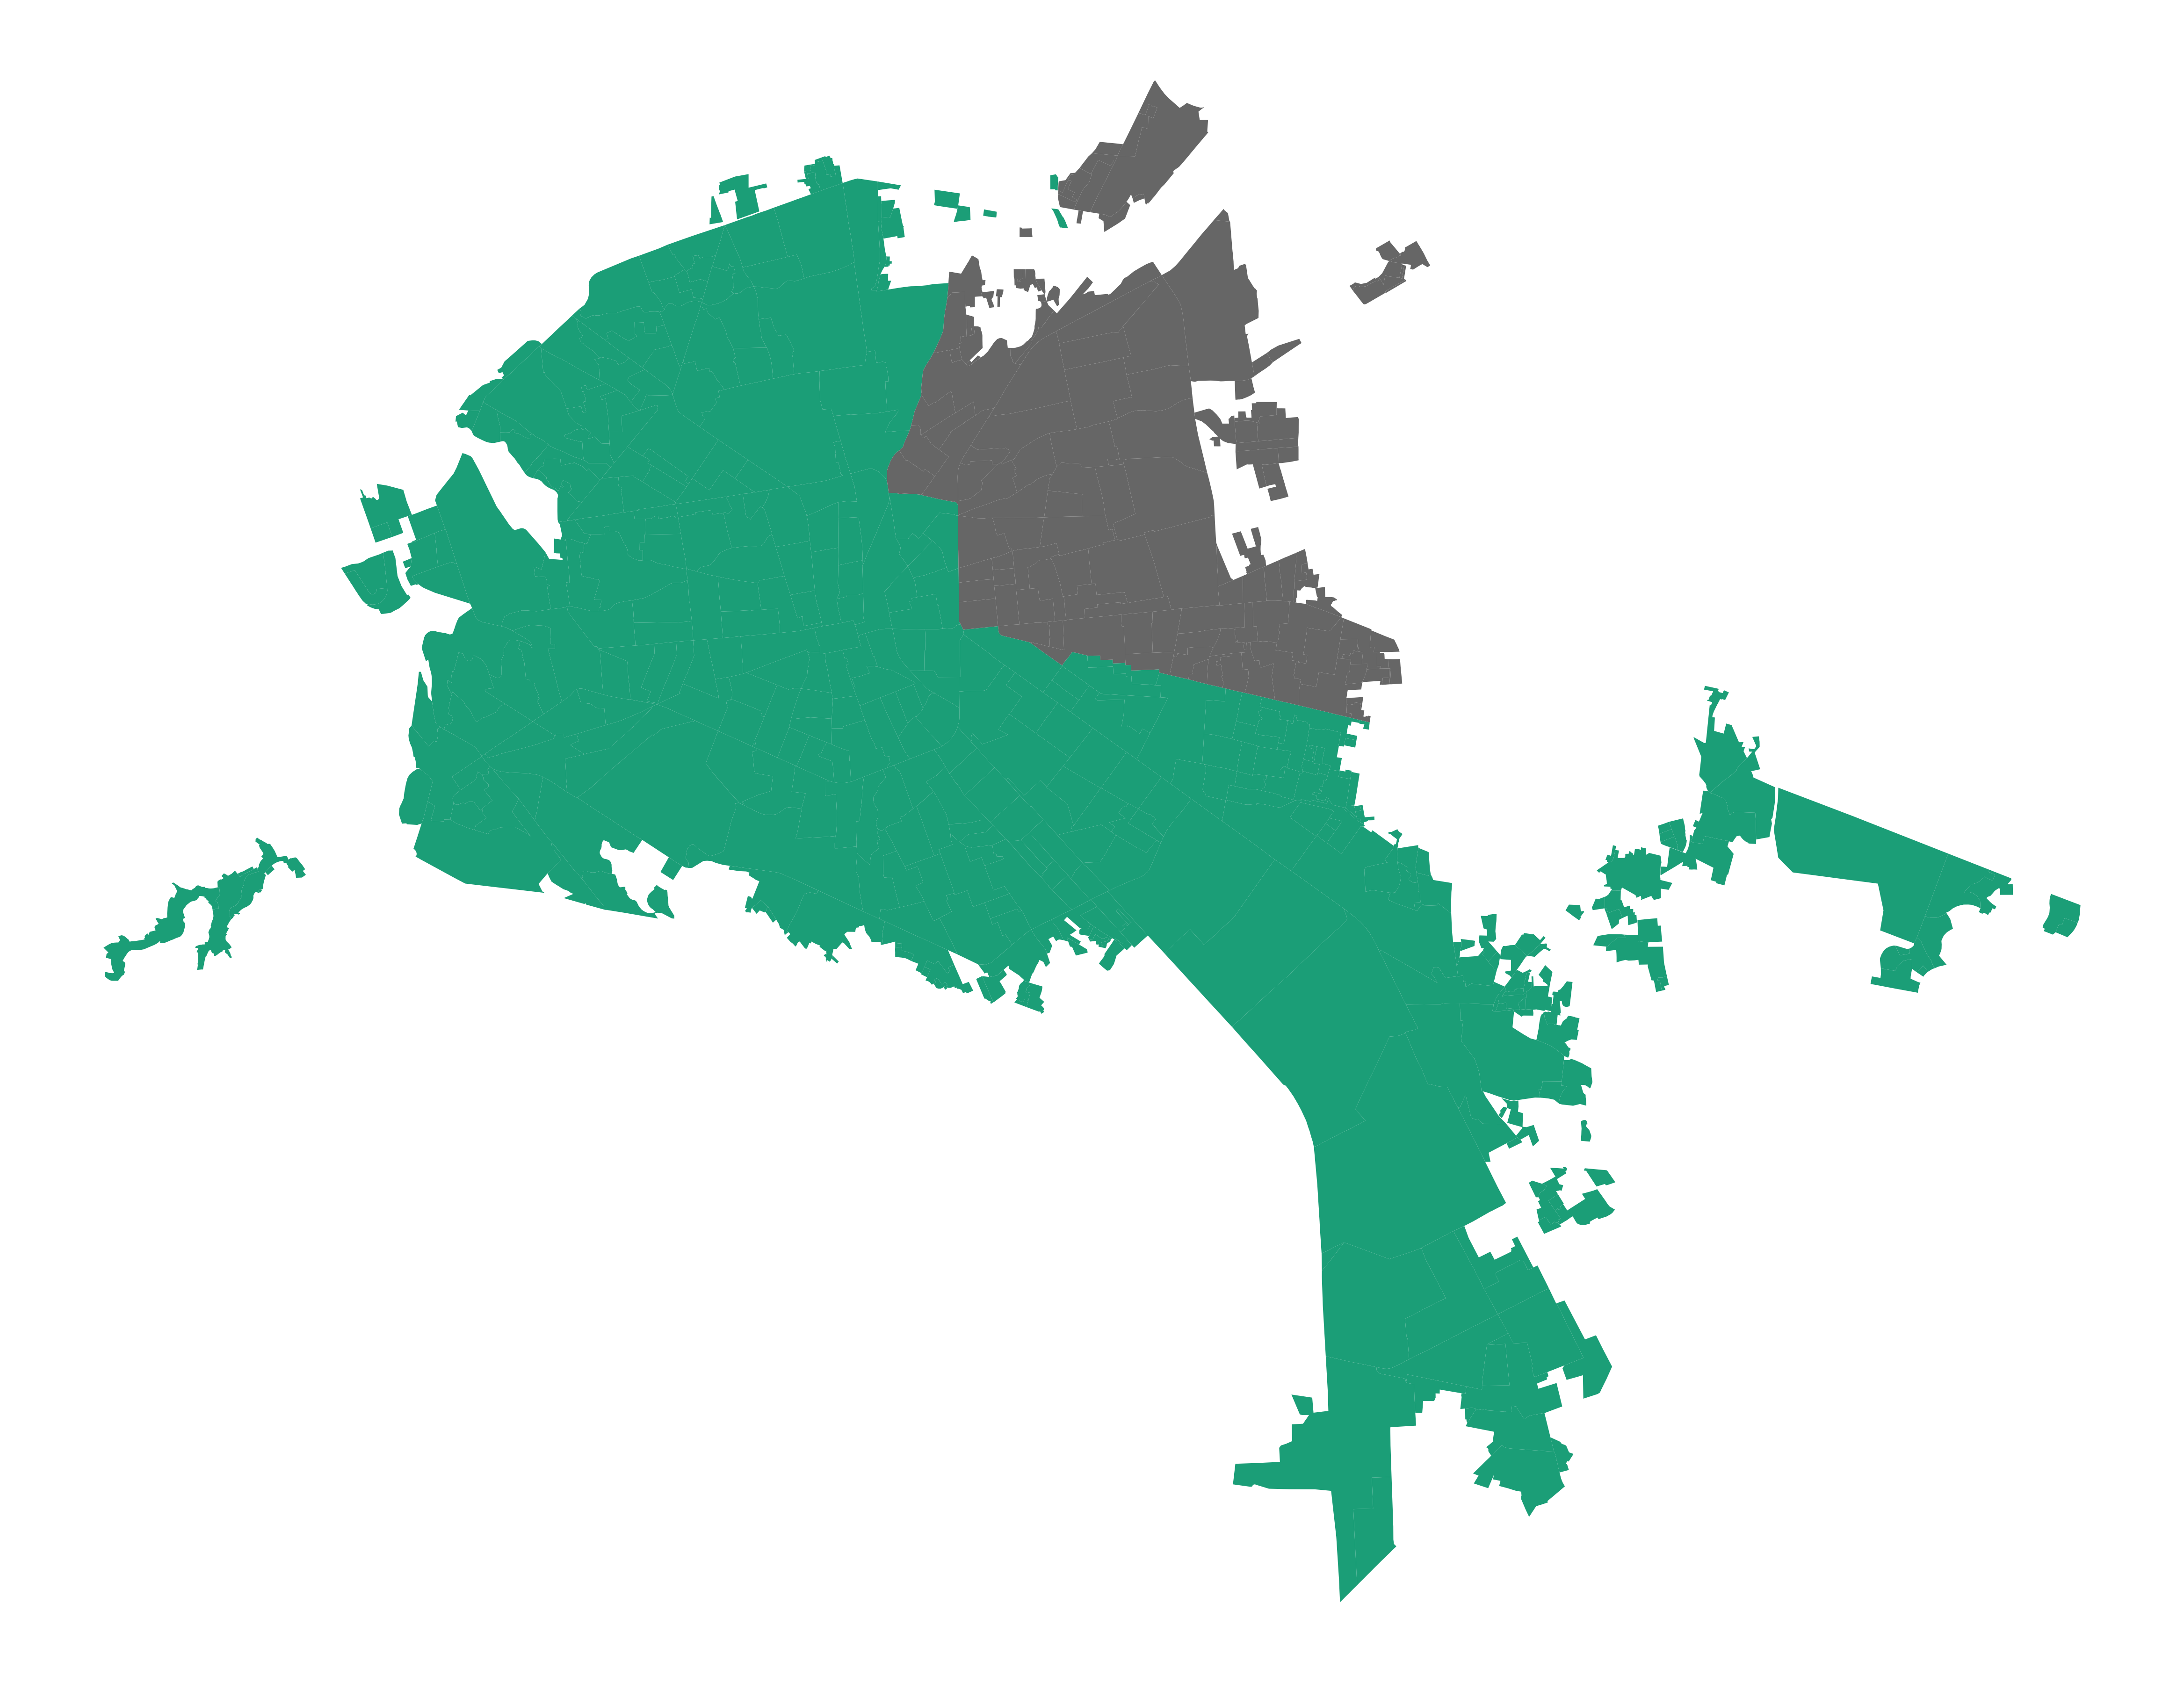

In [7]:
# Plot SLP and SGS municipalities
ax = gdf_zmslp.plot(figsize = (60, 60),cmap='Dark2',column="CVE_MUN")
ax.set_axis_off()

- The  code block above plots in a map SLP and SGS municipalities forming the SLPMA using `Dark`color map.

- `ax.set_axis_off()`: This instruction removes the axis for a cleaner view.

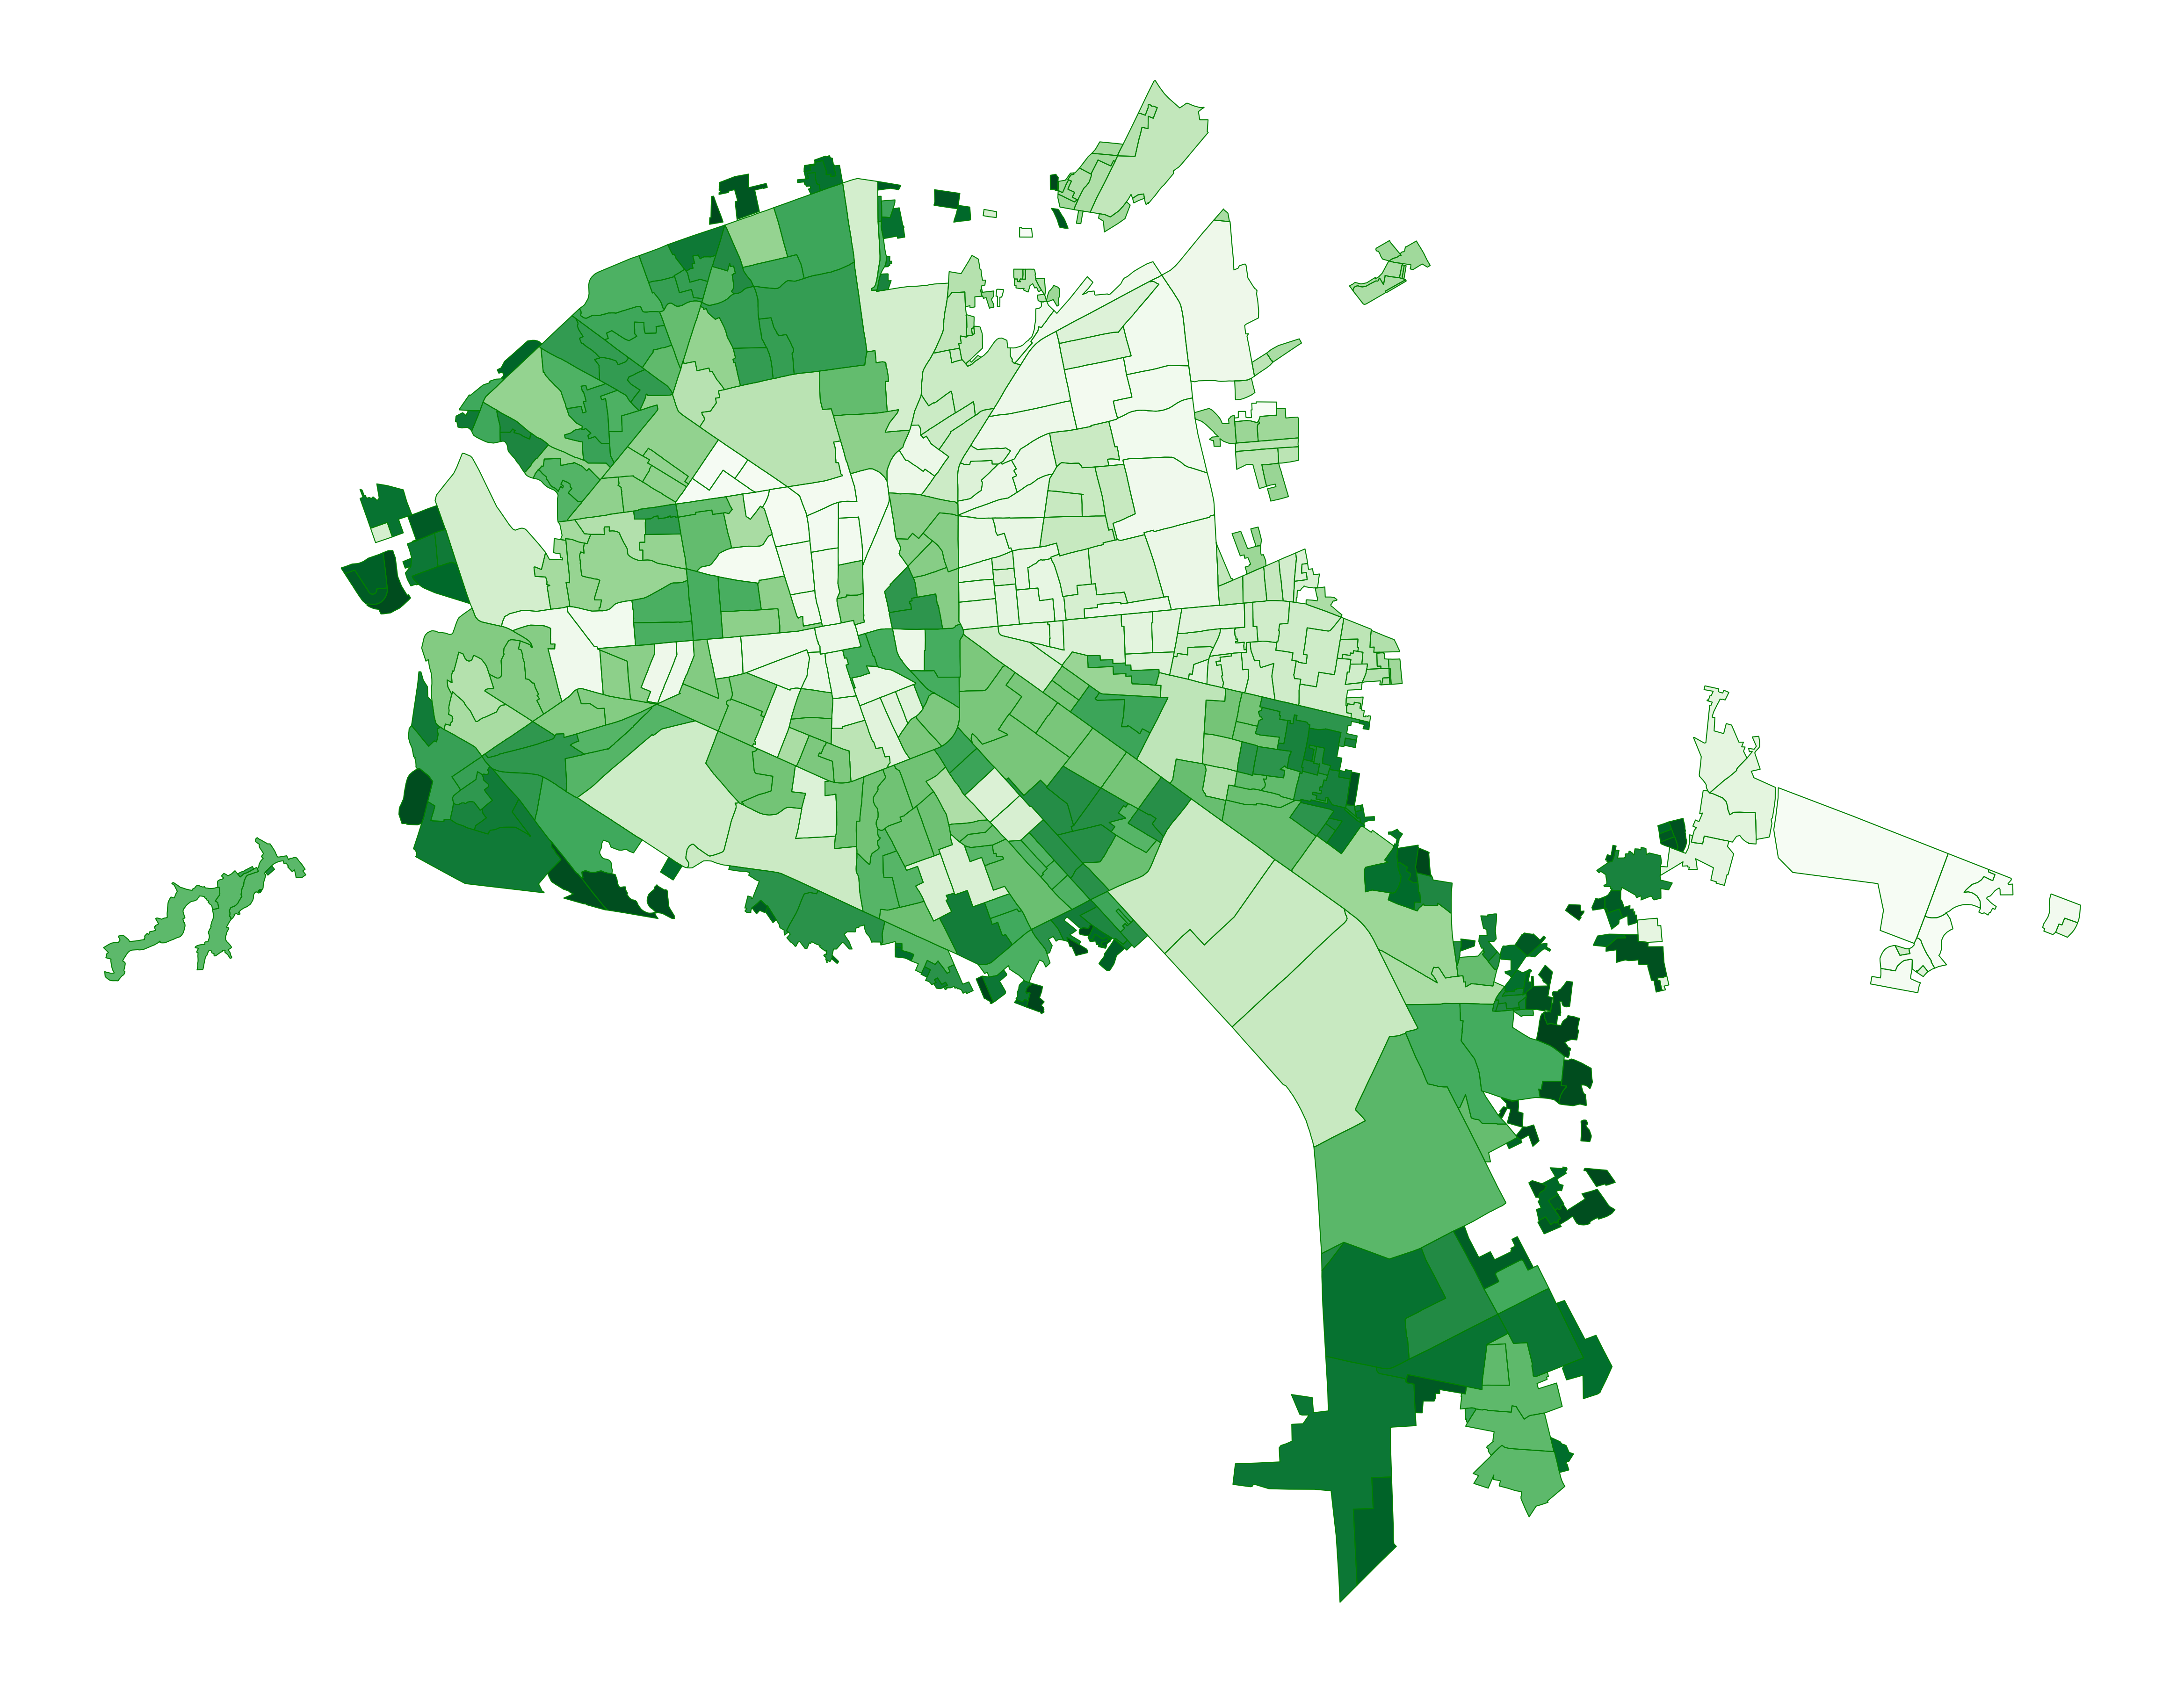

In [8]:
# Plot AGEBs
ax = gdf_zmslp.plot(figsize = (60, 60), column="CVE_AGEB", cmap = "Greens")

# Include AGEBs outlines.
gdf_zmslp.boundary.plot(ax=ax, edgecolor='green')
ax.set_axis_off()

- The  code block above plots in a map SLP and SGS municipalities forming the SLPMA using `Greens`color map. AGEBS are also plotted in the map.

### Plot marginalization data at AGEB level  from  [Consejo Nacional de Población (CONAPO)](https://www.gob.mx/conapo/documentos/indices-de-marginacion-2020-284372).

1. The data set contains popolation information for the AGEB of each municipality. 

2.  Here, we plot the marginalization index only. However we show how to compute population ranges that can be used to plot population information.

3. The file in `dataset/SLPMA/marginalization/`folder contains the following variables.


- `CVE_AGEB: Clave geográfica`:
- `ENT`: The ENT is the state code provided by INEGI. This code is a numeric identifier for each of the states within Mexico, facilitating the organization and retrieval of state-level data in geographic and statistical analyses.
- `NOM_ENT`: The NOM_ENT is the state name.
- `MUN`: The MUN is the municipality code provided by INEGI. Each municipality within a state is assigned a unique CVE_MUN code, which is used to distinguish and manage data specific to municipalities within the broader context of state and national statistics.
- `NOM_MUN`: This  NOM_MUN is the municipality name
- `LOC`: `Clave de la localidad`:
- `NOM_LOC`: The NOM_LOC is the locality name.
- `AGEB`: Clave de la AGEB:
- `POB_TOT`: The POB_TOT is México's  total population.
- `P6A14NAE`: Percentage of population between 6 and14 years that does not attend school. 
- `SBASC`: Percentage of population < 15 years having no elementary school education.
Here is the translation in Markdown format:

- `PSDSS`: Population without access to health services (%)
- `OVSDE`: Occupants in private inhabited dwellings without drainage or toilet (%)
- `OVSEE`: Occupants in private inhabited dwellings without electricity (%)
- `OVSAE`: Occupants in private inhabited dwellings without piped water (%)
- `OVPT`: Occupants in private inhabited dwellings with dirt floors (%)
- `OVHAC`: Occupants in private inhabited dwellings with overcrowding (%)
- `OVSREF`: Occupants in private inhabited dwellings without a refrigerator (%)
- `OVSINT`: Occupants in private inhabited dwellings without internet (%)
- `OSCEL`: Occupants in private inhabited dwellings without a cell phone (%)
- `IM_2020`: Marginalization index, 2020 as defined by CONAPO
- `IM_2020`: Marginalization degree, 2020 as defined by CONAPO
- `IMN_2020`: Normalized marginalization index, 2020 as defined by CONAPO



In [9]:
df = pd.read_csv("../dataset/Mexico/marginalization/IMU_2020.csv")

`df = pd.read_csv("../dataset/SLPMA/marginalization/IMU_2020.csv")`: This line readsa csv file containing the marginalization data. The read file is stored in the variable gdf as a pandas DataFrame.

In [10]:
mapgm = {'Muy bajo': 1, 'Bajo': 2, 'Medio':3, 'Alto': 4, 'Muy alto':5, 'NA': 0 }

`mapgm` is a dictionary that identifies the different marginalization index as defined bay CONAPO: Very Low, Low, Medium, High, Very High (Muy bajo, Bajo, Mediano, Alto, Muy Alto, resp.).

In [11]:
df_slp = df[df['ENT'] == 24].copy()

`df_slp` is a data frame containing a data slice from  `df` data frame corresponding to the San Luis Potosí state.

In [12]:
df_slp_slp = df_slp[df_slp['MUN'] == 28].copy()

`df_slp_slp` is a data frame containing a  data slice from `df_slp` data frame corresponding to the San Luis Potosí municipality.

In [13]:
#df_slp = df[df['ENT'] == 24]
df_slp_sgs = df_slp[df_slp['MUN'] == 35].copy()

`df_slp_sgs` is a data frame containing a data slice from `df_slp` data frame corresponding to the Soledad de Graciano Sánchez  municipality.

In [14]:
frames = [df_slp_slp, df_slp_sgs ]
dft = pd.concat(frames)

- `frames` is the input data structure required  pd.concat() two data frames
- `dft` is a data frame containing data slices from slp and sgs municipalities

In [15]:
dft = dft.reset_index()

- `dft.reset_index()` resets to 0, 1, 2, ... the  data freme rows' indexes. 


In [16]:
gdf_zmslp = gdf_zmslp.reset_index()

- `gdf_zmslp.reset_index()` resets to 0, 1, 2, ... data freme rows' indexes. 

In [17]:
marginalization_index = []
for i in range(0,len(gdf_zmslp)):
    MUN = int(gdf_zmslp['CVE_MUN'].iloc[i])
    AGEB = str(gdf_zmslp['CVE_AGEB'].iloc[i])
    result = dft.query(f"(MUN == {MUN}) and (AGEB =='{AGEB}')")
    if len(result) > 0:
        marginalization_index.append(result['GM_2020'].iloc[0])
    else:  
        marginalization_index.append('N/A')
        

- This code block creates a list (`marginalization_index`) of marginalization indexes for each of the AGEBs associated with each municipality in the data frame `dft`.

In [18]:
        
total_population = []
for i in range(0,len(gdf_zmslp)):
    MUN = int(gdf_zmslp['CVE_MUN'].iloc[i])
    AGEB = str(gdf_zmslp['CVE_AGEB'].iloc[i])
    result = dft.query(f"(MUN == {MUN}) and (AGEB =='{AGEB}')")
    if len(result) > 0:
        total_population.append(result['POB_TOTAL'].iloc[0])
    else:  
        total_population.append(0)
  

- This code block creates a list (`total_population`) of the number of inhabitants for each of the AGEBs associated with each municipality in the data frame `dft`.

In [19]:
count = 0
for t in total_population:
    count = count + t   
tp = []    
for t in total_population: 
    tp.append((t/count*100))       
total_population = tp.copy() 

- This code block computes the percentage of the total population correponding to each AGEB associated with each municipality.

In [20]:
# Create five population ranks
#    '0': 'Unpopulated'
#    '1': '1 - 2,556',
#    '2': '2,557 - 5,111',
#    '3': '5,112 - 7,666',
#    '4': '7,667 - 10,221',
#    '5': '10,222-12,776'

maxpop = max(total_population)
ranks = 5
np.linspace(1,maxpop,5)
total_population_r = []
for i in range(0,len(gdf_zmslp)):
    MUN = int(gdf_zmslp['CVE_MUN'].iloc[i])
    AGEB = str(gdf_zmslp['CVE_AGEB'].iloc[i])
    result = dft.query(f"(MUN == {MUN}) and (AGEB =='{AGEB}')")
    if len(result) > 0:
        pob = result['POB_TOTAL'].iloc[0]
        val = str(int(np.round((maxpop-pob)/maxpop*ranks)))
        total_population_r.append(val)
    else:  
        total_population_r.append(str(0))
                
range_ = np.linspace(1,maxpop,ranks+1)       
pop_range  = []
for r in range_:
    val = str(int(np.round(r)))
    pop_range.append(val)

This code block computes a list `total_population_r` of five population ranks correponding to each AGEB associated with each municipality.

-   0: Unpopulated
-   1: 1 - 2,556
-   2: 2,557 - 5,111
-   3: 5,112 - 7,666
-   4: 7,667 - 10,221
-   5: 10,222-12,776

    

In [21]:
gdf_zmslp.insert(2,'GM', marginalization_index )
gdf_zmslp.insert(2,'POB_TOTAL', total_population )
gdf_zmslp.insert(2,'POB_TOTAL_RANKED', total_population_r )

- This code block inserts new data columns into the GeoPandas `gdf_zmslp` data frame computed in the previous blocks:`marginalization_index`, `total_population`, `total_population_r`.

### Plot the marginalization index in a map

In [22]:
colors = {
    'Muy bajo': '#ffbaba',
    'Bajo': '#ff7b7b',
    'Medio': '#ff5252',
    'Alto': '#ff0000',
    'Muy alto': '#a70000',
    'N/A': '#ffeeee',  
}

 - `colors` is the colormap that will be used to plot the marginalization index.

In [23]:
names = {

    'Muy alto': 'Very High',
    'Alto': 'High',
    'Medio': 'Medium',
    'Bajo': 'Low',
    'Muy bajo': 'Very low',
    'N/A': 'Does not apply'
}

- `names` contains the text that will be used to plot in the map legend.

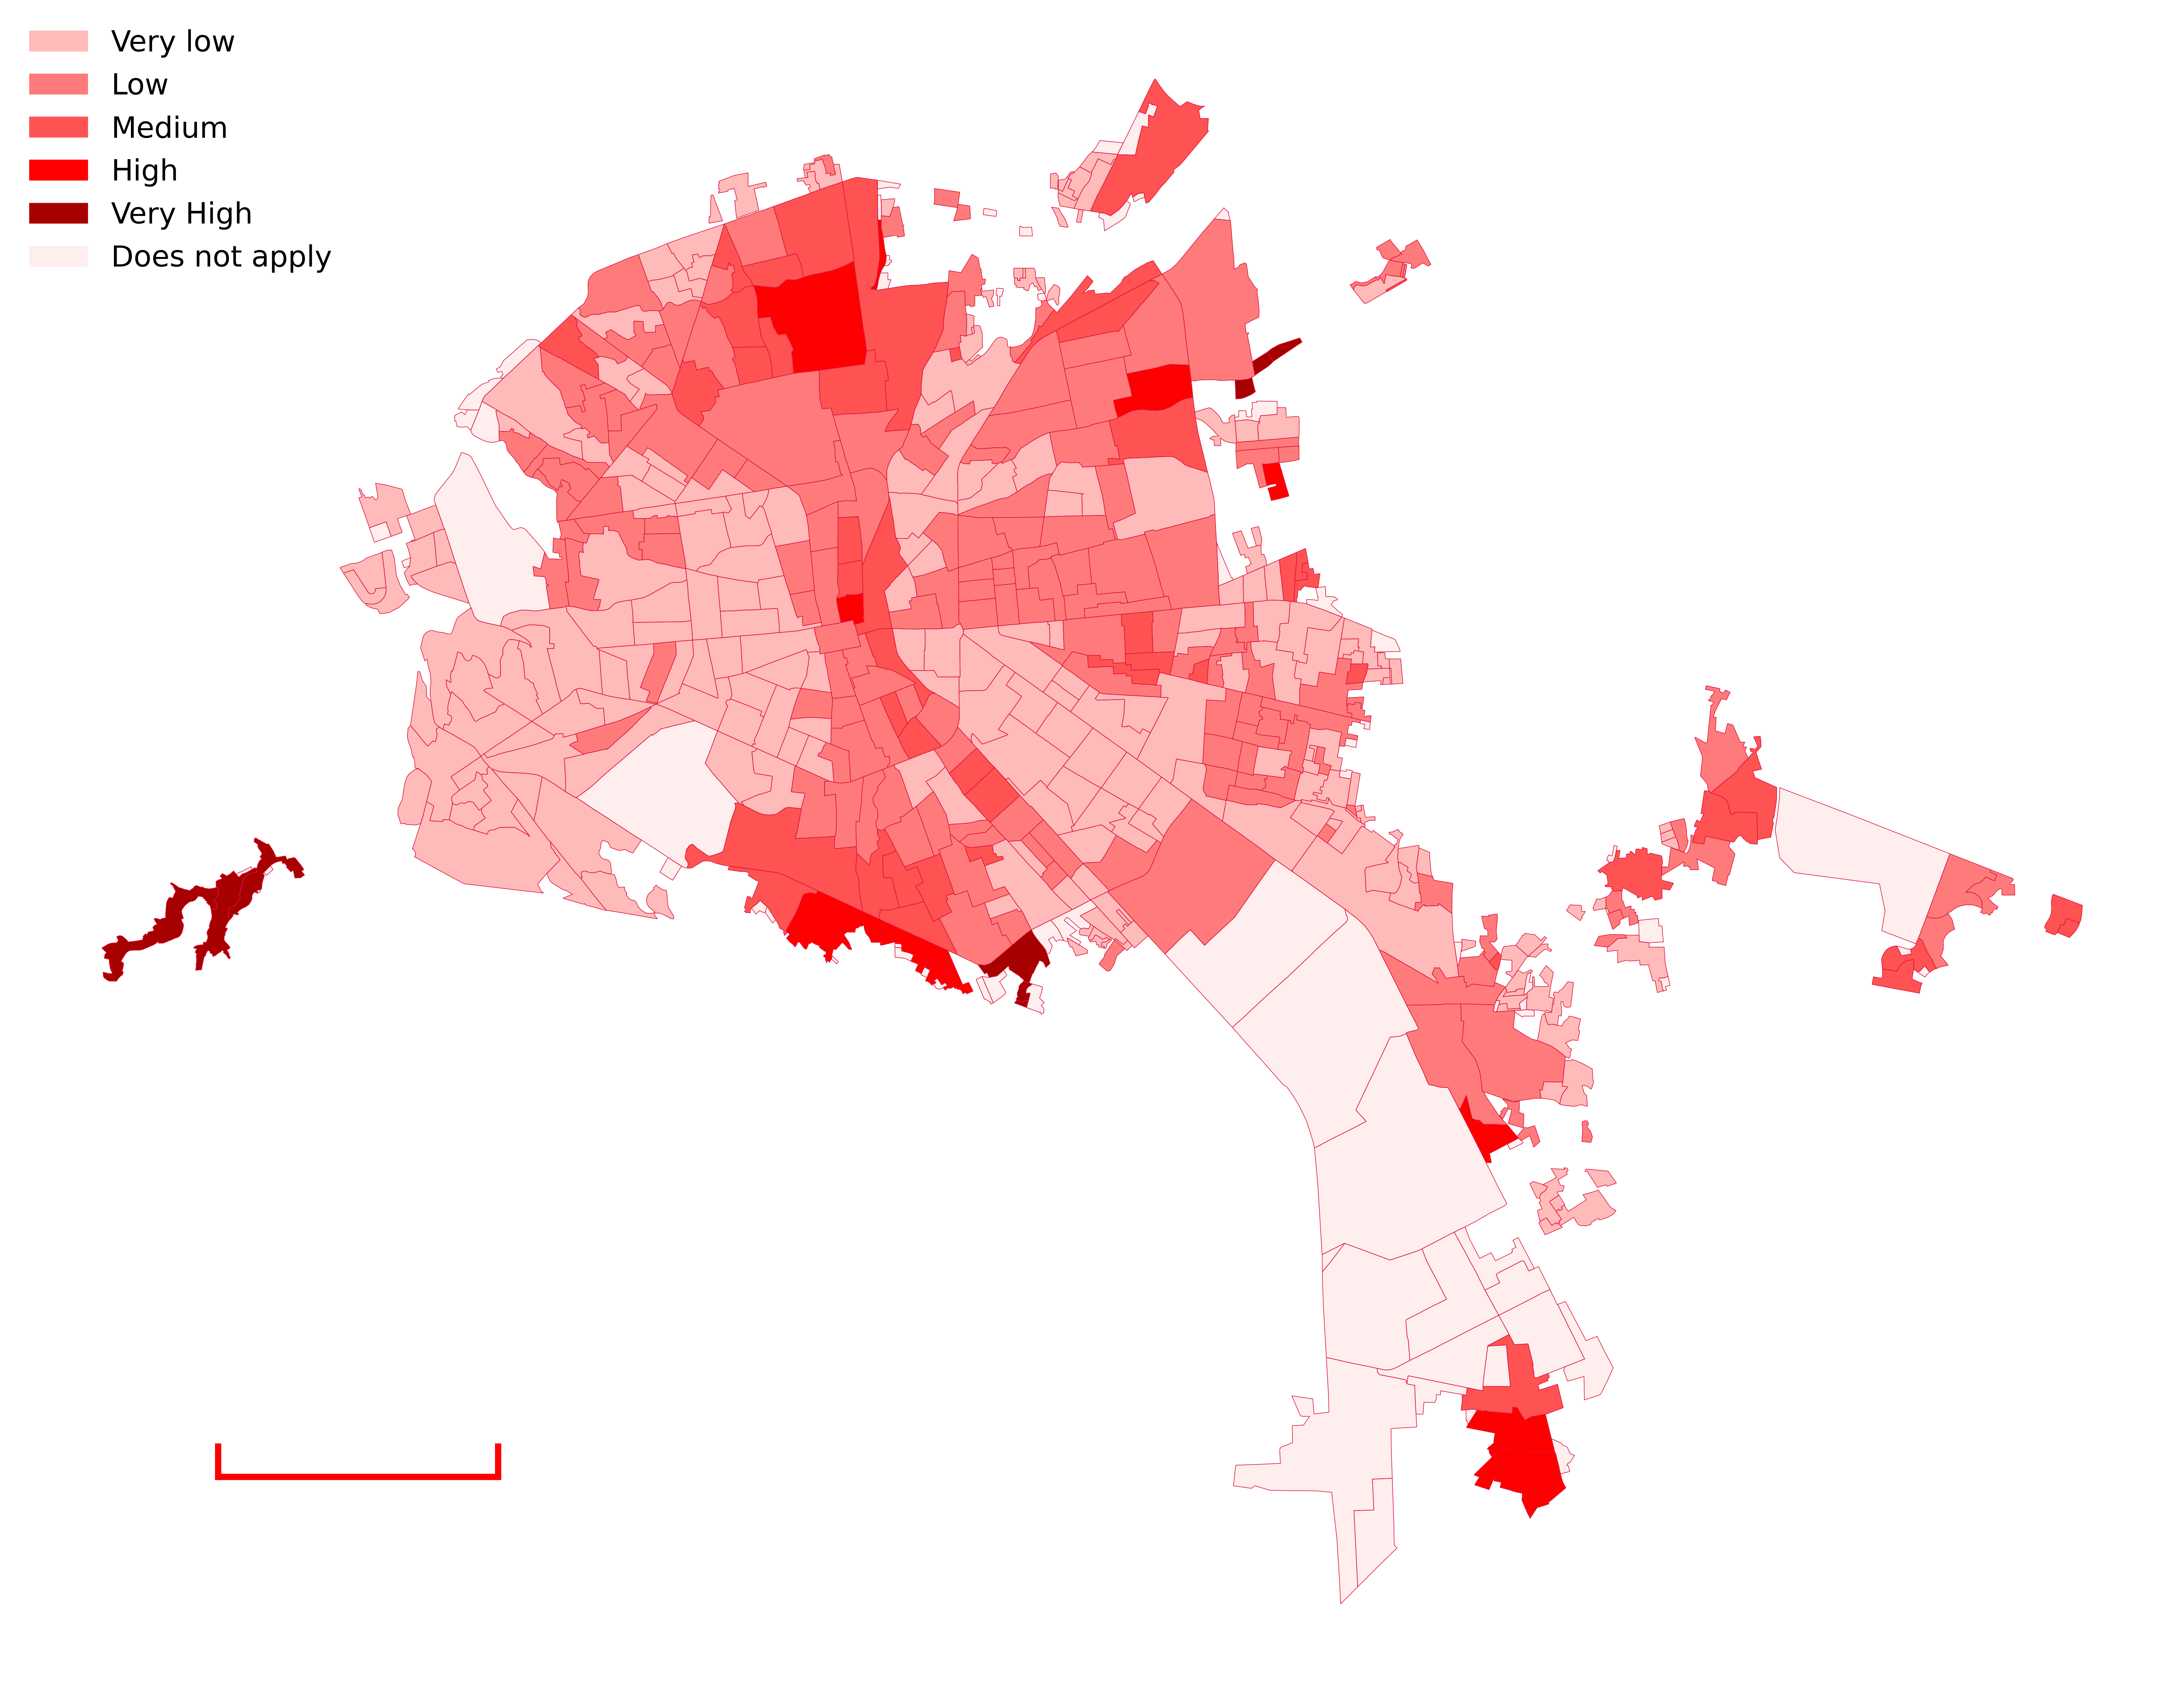

In [24]:
ax =gdf_zmslp.plot(figsize = (100, 100),  color=[colors[d] for d in gdf_zmslp.GM])
gdf_zmslp.boundary.plot(ax=ax,figsize = (100, 100), edgecolor='crimson')
ax.legend(handles=[mpatches.Patch(color=colors[k], 
                                       label=f'{names[k]}') for k in colors],
               loc='upper left',
               fontsize=75,
               edgecolor='none',
               title='',
               title_fontsize='xx-large',
               bbox_to_anchor=(0.0, 1))

r = 6371 # Earth radious
s = 5 # The lenght in kilometers of a scale bar that is plotted in the map
theta = s/r*180/np.pi # The angle in radians corresponding to s 

m = 22.025205  # These are the latitude and longitude where the left of a scale bar is drawn
n = -101.075359 

# Plot an horizontal scale bar
plt.plot([n,n+theta ],[m, m],color='red',linewidth=16) 
plt.plot([n,n],[m, m+theta/10],color='red',linewidth=16) # vertical tick on the left
plt.plot([n+theta,n+theta ],[m+theta/10,m],color='red',linewidth=16)# vertical tick on the right
ax.set_axis_off()
plt.show()

- This code block plots the marginalization index in the SLPMA map. It also plots an horizontal  scale  bar representing 5 km distance.